# Сборный проект. Анализ успешности компьютерных игр

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Требуется выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Для работы предоставлен файл с данными до 2016 года (данные за 2016 год могут быть неполными).

**Описание данных**

* `Name` — название игры
* `Platform` — платформа
* `Year_of_Release` — год выпуска
* `Genre` — жанр игры
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
* `EU_sales` — продажи в Европе (миллионы проданных копий)
* `JP_sales` — продажи в Японии (миллионы проданных копий)
* `Other_sales` — продажи в других странах (миллионы проданных копий)
* `Critic_Score` — оценка критиков (максимум 100)
* `User_Score` — оценка пользователей (максимум 10)
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## План исследования

**1. Знакомство с данными**

Открыть предоставленный файл и ознакомиться с данными

**2. Подготовка данных**

 - заменить названия столбцов (привести к нижнему регистру);
 - преобразовать данные в нужные типы, описать, в каких столбцах заменили тип данных и почему;
 - обработать пропуски при необходимости;
 - объяснить, почему пропуски заполнены определенным образом или почему не заполнены;
 - описать причины, которые могли привести к пропускам;
 - обратить внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей, разобрать это значение и описать, как его обработать;
 - посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.

**3. Исследовательский анализ данных**

 - Посмотреть, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
 - Посмотреть, как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
 - Взать данные за соответствующий актуальный период. Актуальный период определить самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывать в работе данные за предыдущие годы.
 - Какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ.
 - Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат.
 - Посмотреть как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сформулировать выводы.
 - Соотнести выводы с продажами игр на других платформах.
 - Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

**4. Составление портрета пользователя каждого региона**

Определить для пользователя каждого региона (NA, EU, JP):
 - самые популярные платформы (топ-5) (описать различия в долях продаж);
 - самые популярные жанры (топ-5) (пояснить разницу);
 - ответить на вопрос, влияет ли рейтинг ESRB на продажи в отдельном регионе.

**5. Проверка гипотез**

 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
 - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
 - Пороговое значение alpha определить самостоятельно.
 
Пояснить:

 - Как были сформулированы нулевая и альтернативная гипотезы.
 - Какой критерий был применен для проверки гипотез и почему.

**6. Составление общего вывода**

Написать вывод по полученным результатам исследования.

## Открытие файла и знакомство с данными

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot as plt
import math

pd.set_option('display.max_columns', None)

%matplotlib inline

In [2]:
# сохраняем датафрейм в переменную
data = pd.read_csv('datasets/games.csv')

In [3]:
# проверим размерность датафрейма
data.shape

(16715, 11)

In [4]:
# просмотрим первые строки датафрейма
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
# просмотрим общую информацию о датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Предоставленный датафрейм состоит из 16715 строк и 11 столбцов. 

Данные представлены строковыми (`Name`, `Platform`, `Genre`, `User_Score`, `Rating`) и вещественными значениями (`Year_of_Release`, `NA_sales`, `EU_sales`, `JP_sales`, `Other_sales`, `Critic_Score`). 

В некоторых столбцах имеются пропуски, с ними нужно будет поработать. 

Столбец `Year_of_Release` представлен вещественными значениями, в дальнейшем изменим тип данных на целочисленный. 

Названия столбцов начинаются с верхнего регистра, приведем их к нижнему регистру.

## Предобработка данных

**Заменим названия столбцов (приведем их к нижнему регистру).**

In [6]:
data.columns = data.columns.str.lower()

In [7]:
# проверим, что получилось
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Замена выполнена успешно.

**Преобразуем данные в нужные типы.**

Для дальнейшей работы целесообразно и разумно изменить тип данных столбца `year_of_release` с вещественного на целочисленный, поскольку использование целочисленного типа данных более соответствует природе и значениям, которые представляют год выпуска.

Поскольку в столце `year_of_release` есть пропуски, для начала удалим строки, где значение в этом столбце отсутствует (`NaN`).
Пропуски в этом столбце могли появиться вследствие недостаточности информации. Иногда информация о годе выпуска игры может быть недоступной или не полностью известной, особенно для старых или малоизвестных игр. Может быть, произошла ошибка в данных; в некоторых случаях могут быть ошибки или проблемы с получением данных, и это может привести к неполным или некорректным записям. Если датафрейм обновлялся ранее или содержит информацию только до определенного момента времени, то в нем может отсутствовать год выпуска новых игр, которые были выпущены после последнего обновления датафрейма.

In [8]:
data.dropna(subset=['year_of_release'], inplace=True)

In [9]:
# теперь преобразуем тип данных столбца в целочисленный
data['year_of_release'] = data['year_of_release'].astype('int')

In [10]:
# проверим успешность преобразования
data['year_of_release'].dtype

dtype('int32')

**Обработаем пропуски**

Проверим датафрейм на явные дубликаты.

In [11]:
data.duplicated().sum()

0

Явных дубликатов нет.

Теперь проверим наличие неявных дубликатов. Неявные дубликаты в датафрейме — это дублирующиеся строки, которые могут возникать в результате неправильной обработки данных или ошибок при слиянии или объединении таблиц. Проверим наличие схожих записей одновременно по имени `name`, платформе `platform` и году выпуска `year_of_release`.

In [12]:
duplicates = data.duplicated(subset=['name', 'platform', 'year_of_release'])
num_duplicates = duplicates.sum()
num_duplicates

2

Обнаружено 2 неявных дубликата, выполним удаление.

In [13]:
data = data.drop_duplicates(subset=['name', 'platform', 'year_of_release'])

Дубликаты удалены, теперь проверим пропуски.

In [14]:
data.isnull().sum()

name                  1
platform              0
year_of_release       0
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8462
user_score         6606
rating             6677
dtype: int64

В столбцах `name` и `genre` имеется по одному пропуску. Поскольку их количество незначительно, выполним удаление.

In [15]:
data.dropna(subset=['name', 'genre'], inplace=True)

In [16]:
# проверим, что получилось
data.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

В столбцах с оценками критиков (`critic_score`) и пользователей (`user_score`) значительное количество пропусков. Данные могли быть пропущенны по техническим причинам или просто игры не оценивались. При их замене на среднее или медианное значение, распределение сместится и показатели не будут соответствовать реальным значениям, поэтому замену производить не будем.

Однако рассмотрим столбец `user_score` более подробно. Посмотрим возможные значения, которые есть в этом столбце.

In [17]:
data['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Кроме пропущенных значений, в этом столбце есть 2376 значений `tbd` (т.е. "to be defined/determined"), что значит, что оценки еще не определены. Вероятно, это игры, на которые еще нет или мало отзывов и оценок, поэтому, чтобы рейтинг был честным, оценку отметили данным значением. Заменим эти значения на `NaN`, поскольку в дальнейшем нужно будет выполнять расчеты для этого столбца, нужно, чтоб он был представлен типом данных `Not a Number`, тип данных остальных значений в столбце изменим со строкового на вещественный для возможности дальнейших вычислений.

In [18]:
data = data.replace(to_replace="tbd", value='NaN')

# приведем остальные значения в столбце к вещественному типу
data['user_score'] = data['user_score'].astype('float')

Теперь рассмотрим столбец с возрастными категориями.

In [19]:
# посмотрим количество пропусков в столбце
data['rating'].isna().sum()

6676

In [20]:
# посмотрим, сколько уникальных значений в столбце
data['rating'].value_counts()

E       3920
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

В данных представлено 8 возрастных категорий:

* `E` ("Everyone" — "Для всех")
* `T` ("Teen" — "Подросткам")
* `M` ("Mature" — "Для взрослых")
* `E10+` ("Everyone 10 and older" — "Для всех от 10 лет и старше")
* `EC` ("Early childhood" — "Для детей младшего возраста")
* `K-A` ("Kids to Adults" — "Для детей и взрослых")
* `AO` ("Adults Only 18+" — "Только для взрослых")
* `RP` ("Rating Pending" — "Рейтинг ожидается")

Наибольшее количество игр в предоставленных данных относятся к категории `E` (3921 игра), меньше игр категории `T` (2905 игр), практически близкое количество игр категорий `M` и `E10+`, остальные категории в данных представлены несколькими играми.

Пропусков в этом столбце значительное количество, но заменять их модой будет неправильно, исказим данные, 
но чтобы пропуски не мешали в дальнейшей работе, заменим их значением `no_ESRB`, поскольку, скорее всего эти игры не имеют оценки ESRB по разным причинам: значения рейтинга могли не внести в таблицу или соответствующие игры были выпущены в тех странах, в которых подобный рейтинг не присваивается.

In [21]:
data['rating'] = data['rating'].fillna(value='no_ESRB')

In [22]:
# посмотрим, что получилось
data['rating'].value_counts()

no_ESRB    6676
E          3920
T          2905
M          1536
E10+       1393
EC            8
K-A           3
AO            1
RP            1
Name: rating, dtype: int64

Пропуски в столбце с возрастными категориями обработаны.

Пропуски в столбце `year_of_release` мы удалили ранее, когда изменяли тип данных этого столбца.

**Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.**

In [23]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [24]:
# посмотрим, что получилось в результате
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_ESRB,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_ESRB,31.38


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int32  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB


In [26]:
data.shape

(16443, 12)

**Промежуточный вывод:**
    
По результатам предобработки предоставленного датафрейма мы получили датафрейм, состоящий из `16443` строк и `12` столбцов. Все столбцы, кроме двух (оценки критиков и пользователей), не содержат пропусков.

Была выполнена замена названий столбцов (приведены к нижнему регистру), данные преобразованы в нужные типы для удобства дальнейшей работы, обработаны пропуски, отдельно была выполнена работы по замене аббревиатуры `tbd` в столбце с оценкой пользователей, а также были вычислены суммарные продажи во всех регионах и создан отдельный столбец с этими данными.

Датафрейм готов для дальнейшего анализа.

## Исследовательский анализ данных

**Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?**

In [27]:
data['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     652
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64

Из полученной информации видно, начиная с 1994 года, наметилась тенденция роста количества выпускаемых игр, с каждым последюущим годом их становилось все больше и больше, а в период с 2006 по 2011 год выпускалось более тысячи игр каждый код. Самое большое количество игр выпустилось в 2008 и 2009 годах (по 1427 и 1426 соответственно).

Анализ успешности игр включает в себя изучение изменений в индустрии с течением времени. Данные за все периоды помогут определить значимые тенденции. Если важно понять, как и почему популярность игр менялась со временем, то данные за все периоды будут полезны. Имея данные за все периоды, можно сравнивать популярность игр в разные годы и выявлять особенности каждого периода. Это также может помочь понять, как развивалась индустрия игр и какие факторы влияли на ее рост. Данные из разных периодов могут дать контекст и помочь оценить относительную успешность игр. Используя данные за все периоды, можно исследовать прошлые тенденции и попытаться прогнозировать будущую популярность игр. Это может быть полезно при планировании разработки и маркетинга новых игр или принятии стратегических решений. Необходимо, правда, также учитывать актуальность данных. Если имеются новые тренды или существенные изменения в индустрии игр, то старые данные могут быть менее релевантными. В таких случаях может потребоваться обратить внимание на более свежие данные или обновленные источники информации.

**Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы? Возьмем данные за соответствующий актуальный период. Актуальный период определим в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не стоит учитывать в работе данные за предыдущие годы.**

Определим самые популярные платформы с наибольшим количеством проданных игр.

In [28]:
platform_sales = data.pivot_table(index='platform',
                                  values='total_sales',
                                  aggfunc='sum').sort_values(by='total_sales',
                                                             ascending=False)
    
platform_sales

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.33
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Исходя из полученной информации, видим, что наибольшее количество продаж было на шести платформах (`PS2`, `X360`, `PS3`, `Wii`, `DS`, `PS`). Количество продаж на остальных платформах сильно отличается в меньшую сторону.

Построим распределение по годам для каждой из этих шести платформ. Построим графики.

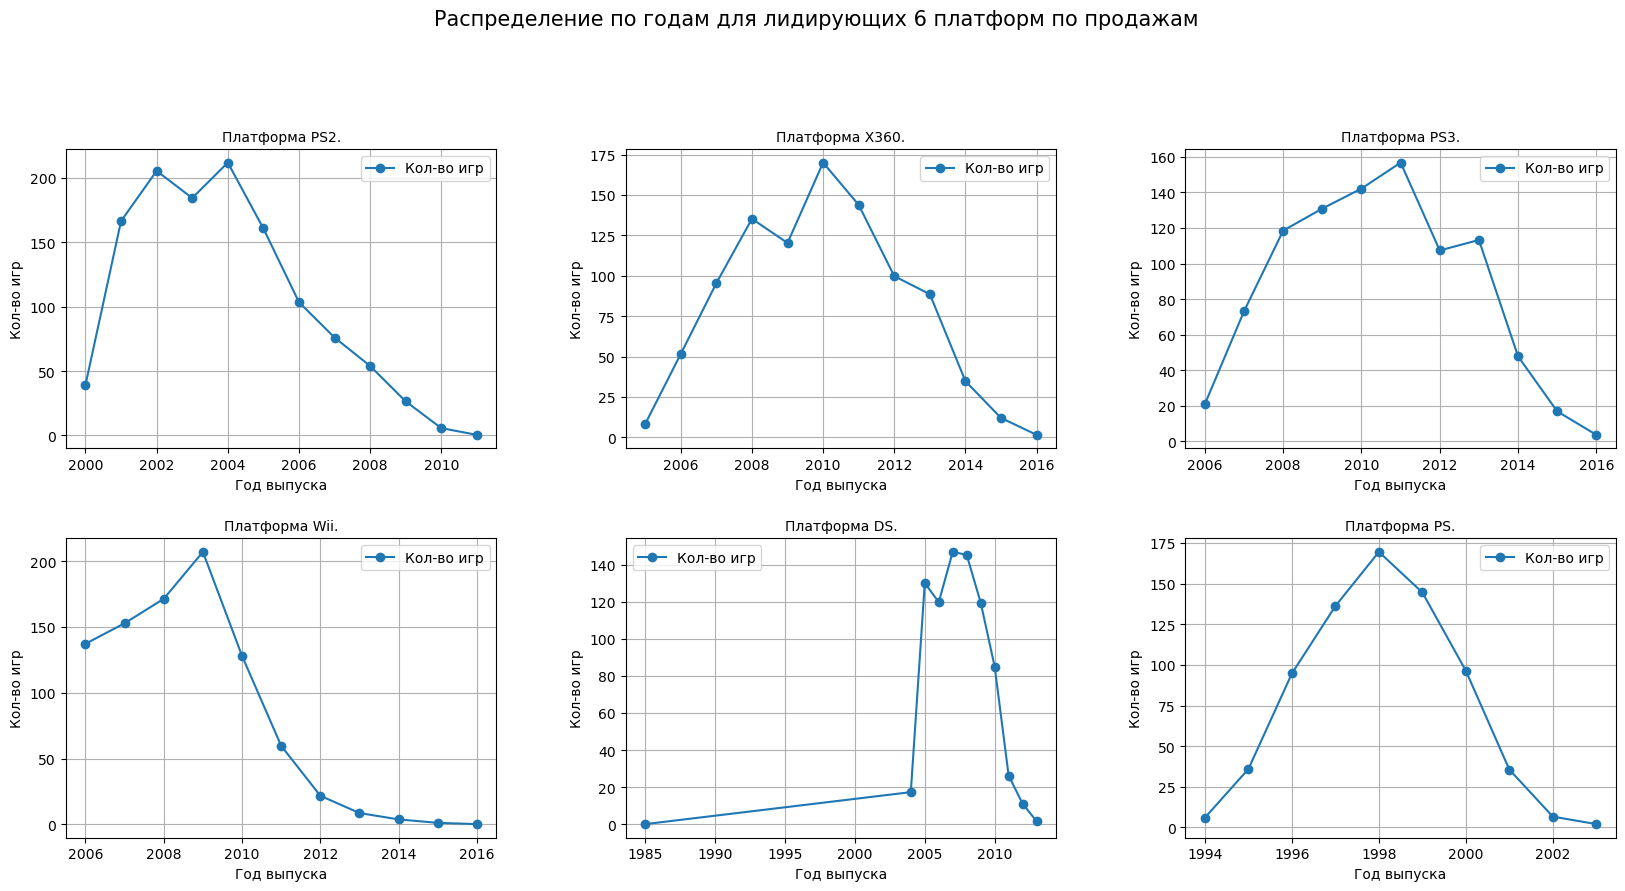

In [29]:
pos = 0
top6_platforms = platform_sales.reset_index()['platform'].head(6)
plt.figure(figsize=[20, 14])
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.suptitle('Распределение по годам для лидирующих 6 платформ по продажам', fontsize=15)
for platform in top6_platforms:
    pos += 1
    tbl = data.query('platform == @platform').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    plt.subplot(3, 3, pos)
    plt.title(f'Платформа {platform}.', fontsize=10)
    plt.plot(tbl, 'o-', label='Кол-во игр', alpha=1)
    plt.ylabel('Кол-во игр')
    plt.xlabel('Год выпуска')
    plt.grid(True)
    plt.legend()
plt.show();

Определим характерный срок, за который появляются новые и исчезают старые платформы. 

По полученным графикам можно узнать время жизни каждой платформы с момента роста продаж до момента их спада. 

Продажи игр платформы `PS` (вторая строка, третий график) начались в 1994 году и росли до 1998 года, здесь был самый высокий уровень продаж, затем продажи начали падать и подошли к нулевому уровню к 2003 году. 

Видим, что в 2000 году начались продажи игр на платформе `PS2` (первая строка, первый график), с небольшим спадом в 2003 году они росли до 2004 года, затем начался спад продаж и к 2011 году он был на нулевом уровне. 

В 2006 году начались продажи игр на платформе `PS3` (первая строка, третий график), они достигли максимума к 2011 году, после чего начался спад  с небольшим подъемом в 2013 году, а дажее продажи начали палать и к 2016 году достигли нулевого уровня.

Эта ситуация с ростом продаж и последующим падением до нуля объясняется тем, что компания `PlayStation` выпускала новые модели консолей, и одна модель сменяла другую.

На платформе `X360` (первая строка, второй график) начались продажи игр в 2005 году, в 2009 году был небольшой спад уровня продаж, но затем к 2010 году уровень продаж достиг максимального уровня, далее начался спад и к 2016 году продажи упали до 0.

На платформе `Wii` (третья строка, первый график) начались продажи игр в 2006 году, рост продаж наблюдался до 2009 года, затем продажи пошли на спал и в 2016 году достигли 0.

Исходя из полученных данных, продажи на  платформе `DS` (третья строка, второй график) начались аж в 1985 году, но, изучив информацию в Интернете, можно узнать, что повяилась эта платформа лишь в конце 2004 года. Получается, что сразу после выхода этой платформы, с 2004—2005 годов примерно до 2007 года наблюдался резкий рост продаж и небольшим спадом в начале 2005 года, примерно с 2008 года продажи начали падать, а к 2013 году продажи достигли нулевого уровня.

Таким образом, посчитаем средний срок жизни игровых платформ.

In [30]:
temp = data.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1  
                                                            
time_life['life'].median()

7.0

In [31]:
print('Средний срок жизни платформы:', time_life['life'].median(), 'лет.')

Средний срок жизни платформы: 7.0 лет.


Делаем вывод, что в среднем игровая платформа живет около 7 лет.

Несколько платформ имеют тенденцию к спаду количества выпускаемых игр к 2016 году.

Для дальнейшего анализа и построения прогноза на 2017 год возьмем период в **три года**, т. е. с 2014 по 2016 гг. включительно. **Актуальность** выбранного периода объясняется тем, что три года — это достаточный срок, чтобы отследить тенденции развития индустрии игр.

Выберем данные за выбранный **актуальный период**.

In [32]:
actual_period = data.query('year_of_release >= 2014')

In [33]:
actual_period

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_ESRB,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,no_ESRB,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,no_ESRB,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no_ESRB,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,no_ESRB,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,no_ESRB,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no_ESRB,0.01


**Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.**

In [34]:
actual_leaders = actual_period.pivot_table(index='platform',
                                    values='total_sales',
                                    aggfunc='sum').sort_values(by='total_sales', ascending=False)
actual_leaders

,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


Итого для анализа выбрано 10 платформ.

Сравнивая тем, что мы наблюдали выше, видим, что за выбранный период продажи игр на платформах `Wii`, `DS`, `PS2`, `X360`, `PS` упали, и лидерами продаж теперь являются платформы `PS4`, `XOne`, `3DS` и `PS3`.

Определим потенциально прибыльные платформы. Как мы определили выше, жизненный цикл платформы в среднем составляет 7 лет, поэтому платформы, находящиеся в середине или начале жизненного цикла, могут иметь больше потенциала для прибыли. А чем выше объем продаж, тем больше вероятность получения прибыли.

Посмотрим объем продаж.

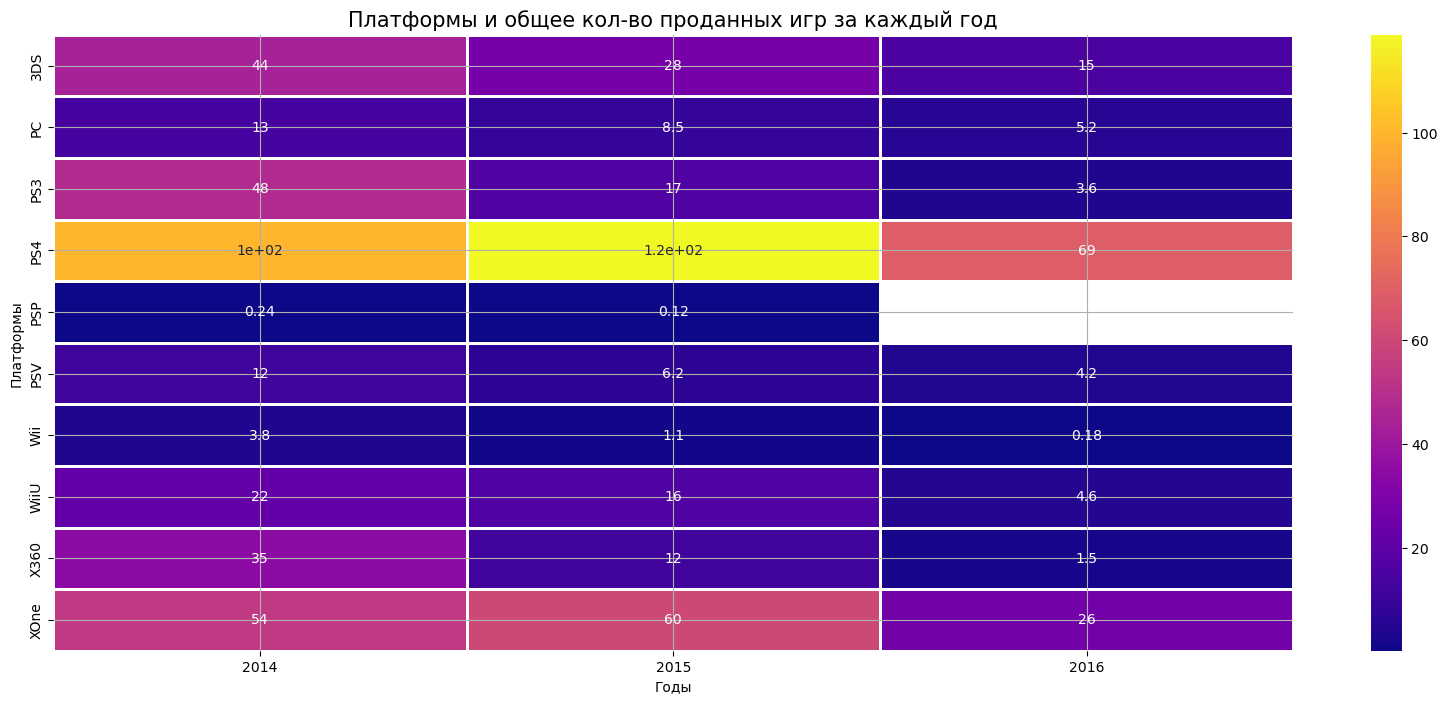

In [35]:
plt.figure(figsize=(20, 8))
plt.title('Платформы и общее кол-во проданных игр за каждый год', fontsize=15)
sns.heatmap(actual_period.pivot_table(index='platform',
                                      columns='year_of_release',
                                      values='total_sales',
                                      aggfunc='sum'), annot=True, cmap="plasma", linewidths=2)
plt.ylabel('Платформы')
plt.xlabel('Годы')
plt.grid(True);

Посмотрим год начала выпуска игр на этих платформах.

In [36]:
for platform in actual_leaders.index:
    platform_data = data.loc[data['platform'] == platform]
    min_year = platform_data['year_of_release'].min()
    print('На платформе', platform, 'старт продаж начался в', min_year, 'году. Итого на начало 2017 года ей', 2017 - min_year, 'лет.')

На платформе PS4 старт продаж начался в 2013 году. Итого на начало 2017 года ей 4 лет.
На платформе XOne старт продаж начался в 2013 году. Итого на начало 2017 года ей 4 лет.
На платформе 3DS старт продаж начался в 2011 году. Итого на начало 2017 года ей 6 лет.
На платформе PS3 старт продаж начался в 2006 году. Итого на начало 2017 года ей 11 лет.
На платформе X360 старт продаж начался в 2005 году. Итого на начало 2017 года ей 12 лет.
На платформе WiiU старт продаж начался в 2012 году. Итого на начало 2017 года ей 5 лет.
На платформе PC старт продаж начался в 1985 году. Итого на начало 2017 года ей 32 лет.
На платформе PSV старт продаж начался в 2011 году. Итого на начало 2017 года ей 6 лет.
На платформе Wii старт продаж начался в 2006 году. Итого на начало 2017 года ей 11 лет.
На платформе PSP старт продаж начался в 2004 году. Итого на начало 2017 года ей 13 лет.


Платформа `PC` — самая старая из представленных платформ, продажи игр на этой платформе не имеют существенного спада, кроме того, персональные компьютеры продолжают широко использоваться игроками, поэтому снимать со счетов мы ее не будем и оставим в потенциально прибыльных платформах.

Продажи на платформах `PS4` и `XOne` за выбранные три года хоть и упали упали, но все же не до критических отметок, плюс их возраст всего 4 года на начало 2017, поэтому определим их в число перспективных. 

Платформа `WiiU` демонстрирует значительный рост продаж.

Однако стоит отметить, что в целом продажи игр в 2016 году пошли на спад, рост продаж демонстрирует только платформа `WiiU`.

Итого **потенциально прибыльными платформами** будем считать 4 платформы: `PC`, `PS4`, `XOne` и `WiiU`.

**Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.**

Сначала построим диаграмму размаха в полном виде, со всеми выбросами.

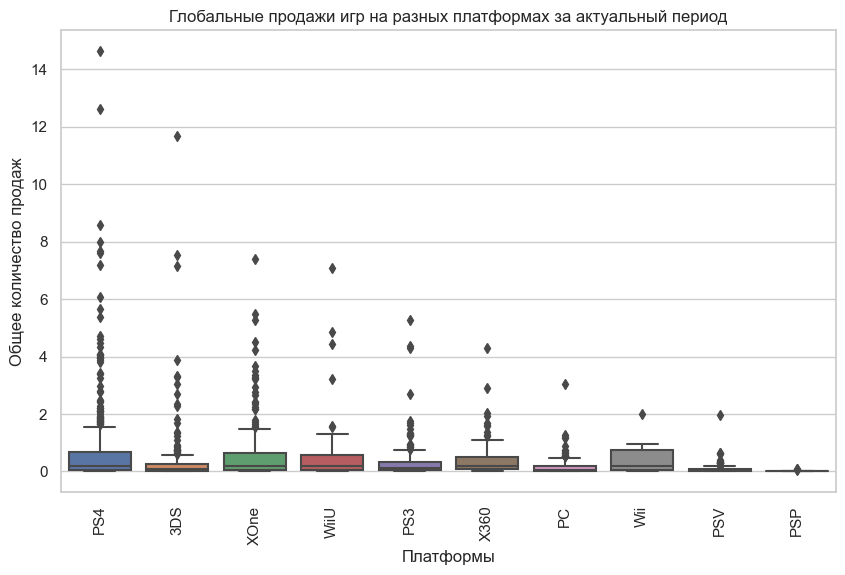

In [37]:
sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(x="platform", y="total_sales", data=actual_period, ax=ax)

ax.set_xlabel("Платформы")
ax.set_ylabel("Общее количество продаж")
ax.set_title("Глобальные продажи игр на разных платформах за актуальный период")

plt.xticks(rotation=90)
plt.show();

Теперь выполним масштабирование диаграммы для большей наглядности.

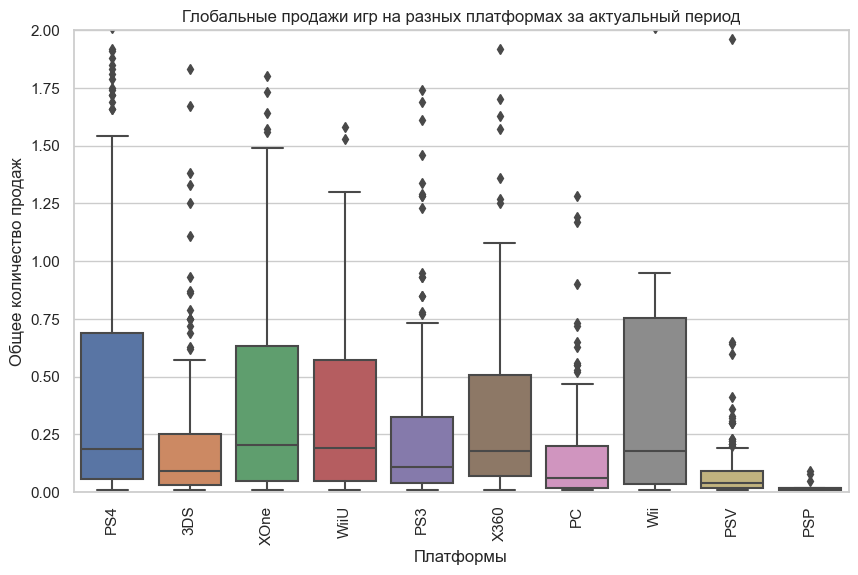

In [38]:
sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(x="platform", y="total_sales", data=actual_period, ax=ax)

ax.set_xlabel("Платформы")
ax.set_ylabel("Общее количество продаж")
ax.set_title("Глобальные продажи игр на разных платформах за актуальный период")

ax.set_ylim(0, 2) 

plt.xticks(rotation=90)
plt.show();

По графику можно сказать, что большего всего за выбранный выше **актуальный период** продаются игры для `Wii`, `PS4`, `XOne` и `WiiU`, далее идет `X360`, остальные платформы от них значительно отстают.

На графике медианы этих платформ располагаются примерно на одном уровне. Разброс значений у `PS4` достаточно большой, далее идет `XOne`, имеются значительные выбросы, далее идет `WiiU`, здесь выбросов меньше.

Исходя из полученного графика можно выделить платформы со стабильно высокими продажами: `XOne`, `WiiU`, `PS4`, `X360` и `Wii`.

**Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.**

In [39]:
# вспомним лидирующие 10 платформ, выбранных за актуальный период

platforms = []

for platform in actual_leaders.index:
    platforms.append(platform)

print(platforms)    

['PS4', 'XOne', '3DS', 'PS3', 'X360', 'WiiU', 'PC', 'PSV', 'Wii', 'PSP']


In [40]:
# создадим датафрейм
profitable_platforms_df = actual_period[actual_period['platform'].isin(platforms)]

In [41]:
profitable_platforms_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_ESRB,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,no_ESRB,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,no_ESRB,7.98


Посмотрим варианты оценок, доступные в столбцах `user_score` и `critic_score`.

In [42]:
pd.set_option('display.max_rows', None)

profitable_platforms_df['user_score'].value_counts()

7.1    40
6.8    36
7.8    33
8.0    31
7.0    29
7.3    29
8.1    26
7.6    26
7.4    26
7.7    25
7.9    25
7.5    24
8.2    24
8.3    21
6.9    21
6.1    19
6.6    19
6.3    19
6.4    19
5.1    18
7.2    18
8.4    18
8.5    18
6.2    17
5.9    15
5.7    14
6.0    14
8.6    14
5.5    13
4.3    12
6.5    12
8.7    12
5.8    12
6.7    12
5.4    11
3.4     9
8.8     9
4.1     9
5.6     8
4.8     8
4.4     8
5.3     8
3.1     7
4.5     6
4.2     6
4.9     5
3.5     5
4.6     5
3.8     5
8.9     4
4.7     4
3.0     4
3.2     4
3.7     4
5.2     4
4.0     3
3.6     3
2.4     3
5.0     3
2.9     3
2.8     3
1.6     2
1.4     2
2.5     2
2.0     2
9.0     2
9.3     2
3.3     2
9.2     2
1.7     1
2.7     1
1.5     1
0.7     1
3.9     1
2.1     1
0.2     1
1.9     1
9.1     1
2.3     1
Name: user_score, dtype: int64

In [43]:
profitable_platforms_df['critic_score'].value_counts()

73.0    31
81.0    30
71.0    29
80.0    29
76.0    28
72.0    27
70.0    24
74.0    24
78.0    24
77.0    23
69.0    23
83.0    23
75.0    22
82.0    20
86.0    20
66.0    19
85.0    18
79.0    18
84.0    17
87.0    17
67.0    17
68.0    16
63.0    16
88.0    15
64.0    15
60.0    15
65.0    14
58.0    11
62.0    11
91.0    10
59.0     9
61.0     7
90.0     7
89.0     7
53.0     6
43.0     6
48.0     5
57.0     5
51.0     4
93.0     4
56.0     4
55.0     4
45.0     4
46.0     3
52.0     3
32.0     3
54.0     3
47.0     3
49.0     3
42.0     2
44.0     2
35.0     2
97.0     2
50.0     2
92.0     2
19.0     1
39.0     1
20.0     1
36.0     1
40.0     1
95.0     1
25.0     1
96.0     1
31.0     1
26.0     1
Name: critic_score, dtype: int64

Каких-то необычных значений (например, отрицательных или нулевых) нет, идем дальше.

In [44]:
# выберем данные для платформы PS4
ps4_df = profitable_platforms_df[profitable_platforms_df['platform'] == 'PS4']
ps4_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_ESRB,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,no_ESRB,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


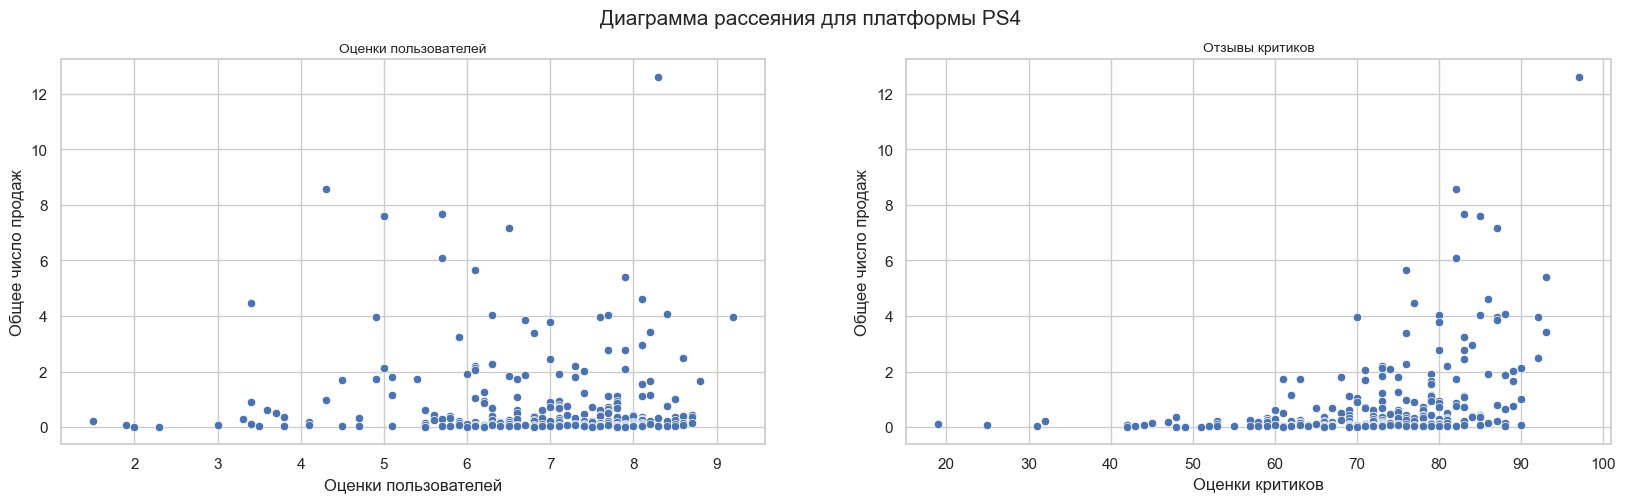

In [45]:
# построим диаграмму рассеяния
plt.figure(figsize=(20, 5))
plt.suptitle('Диаграмма рассеяния для платформы PS4', fontsize=15)

plt.subplot(1, 2, 1)
plt.title('Оценки пользователей', fontsize=10)
sns.scatterplot(x='user_score', y='total_sales', data=ps4_df)
plt.ylabel('Общее число продаж')
plt.xlabel('Оценки пользователей')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.title('Отзывы критиков', fontsize=10)
sns.scatterplot(x='critic_score', y='total_sales', data=ps4_df)
plt.ylabel('Общее число продаж')
plt.xlabel('Оценки критиков')
plt.grid(True);

In [46]:
corr_with_critic_score = ps4_df['total_sales'].corr(ps4_df['critic_score'])
corr_with_critic_score

0.40266141068104083

In [47]:
corr_with_user_score = ps4_df['total_sales'].corr(ps4_df['user_score'])
corr_with_user_score

-0.040131589472697356

**Вывод:** мы имеем отрицательную корреляцию с оценками пользователей (`-0.04`) и умеренную положительную корреляцию (`0.4`) с оценками критиков. Судя по всему, мнение критиков более важно для совершения покупки, а мнение пользователей неважно совсем.

**Соотнесем выводы с продажами игр на других платформах.**

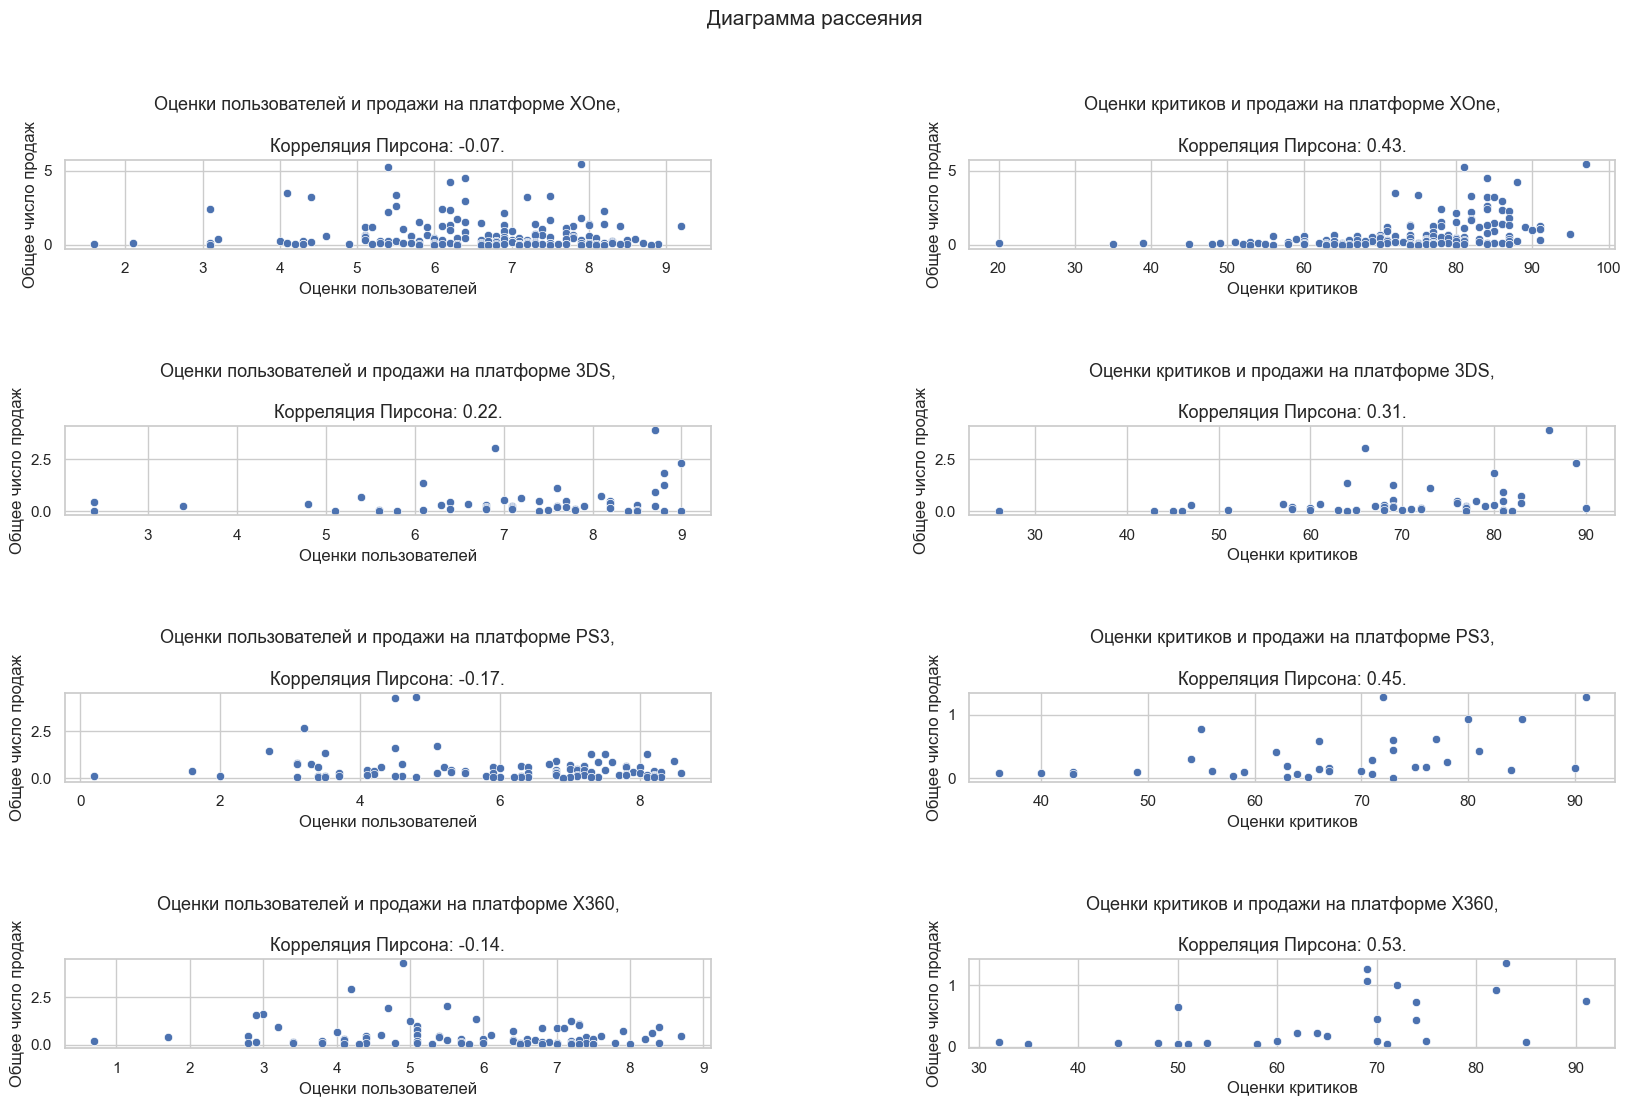

In [48]:
# также построим диаграмму рассеяния сначала для части оставшихся лидирующих за актуальный период платформ 
# для наглядности графика, потом для второй части

rest_of_platforms_part1 = ['XOne', '3DS', 'PS3', 'X360']

pos = 0
plt.figure(figsize=(20,15))
plt.subplots_adjust(wspace=0.4, hspace=2)
plt.suptitle('Диаграмма рассеяния', fontsize=15)

for platform in rest_of_platforms_part1:
    pos += 1
    inter_df = profitable_platforms_df[(profitable_platforms_df['platform'] == platform)]
    
    if pos > 10:
        break
    
    plt.subplot(5, 2, pos)
    corr_with_user_score = inter_df['total_sales'].corr(inter_df['user_score'])
    plt.title(f'Оценки пользователей и продажи на платформе {platform},\n\nКорреляция Пирсона: {corr_with_user_score:.2f}.', fontsize=13)
    sns.scatterplot(x='user_score', y='total_sales', data=inter_df)
    plt.xlabel('Оценки пользователей')
    plt.ylabel('Общее число продаж')
    plt.grid(True)
    
    pos += 1
    
    if pos > 10:
        break
    
    plt.subplot(5, 2, pos)
    corr_with_critic_score = inter_df['total_sales'].corr(inter_df['critic_score'])
    plt.title(f'Оценки критиков и продажи на платформе {platform},\n\nКорреляция Пирсона: {corr_with_critic_score:.2f}.', fontsize=13)
    sns.scatterplot(x='critic_score', y='total_sales', data=inter_df)
    plt.xlabel('Оценки критиков')
    plt.ylabel('Общее число продаж')
    plt.grid(True)

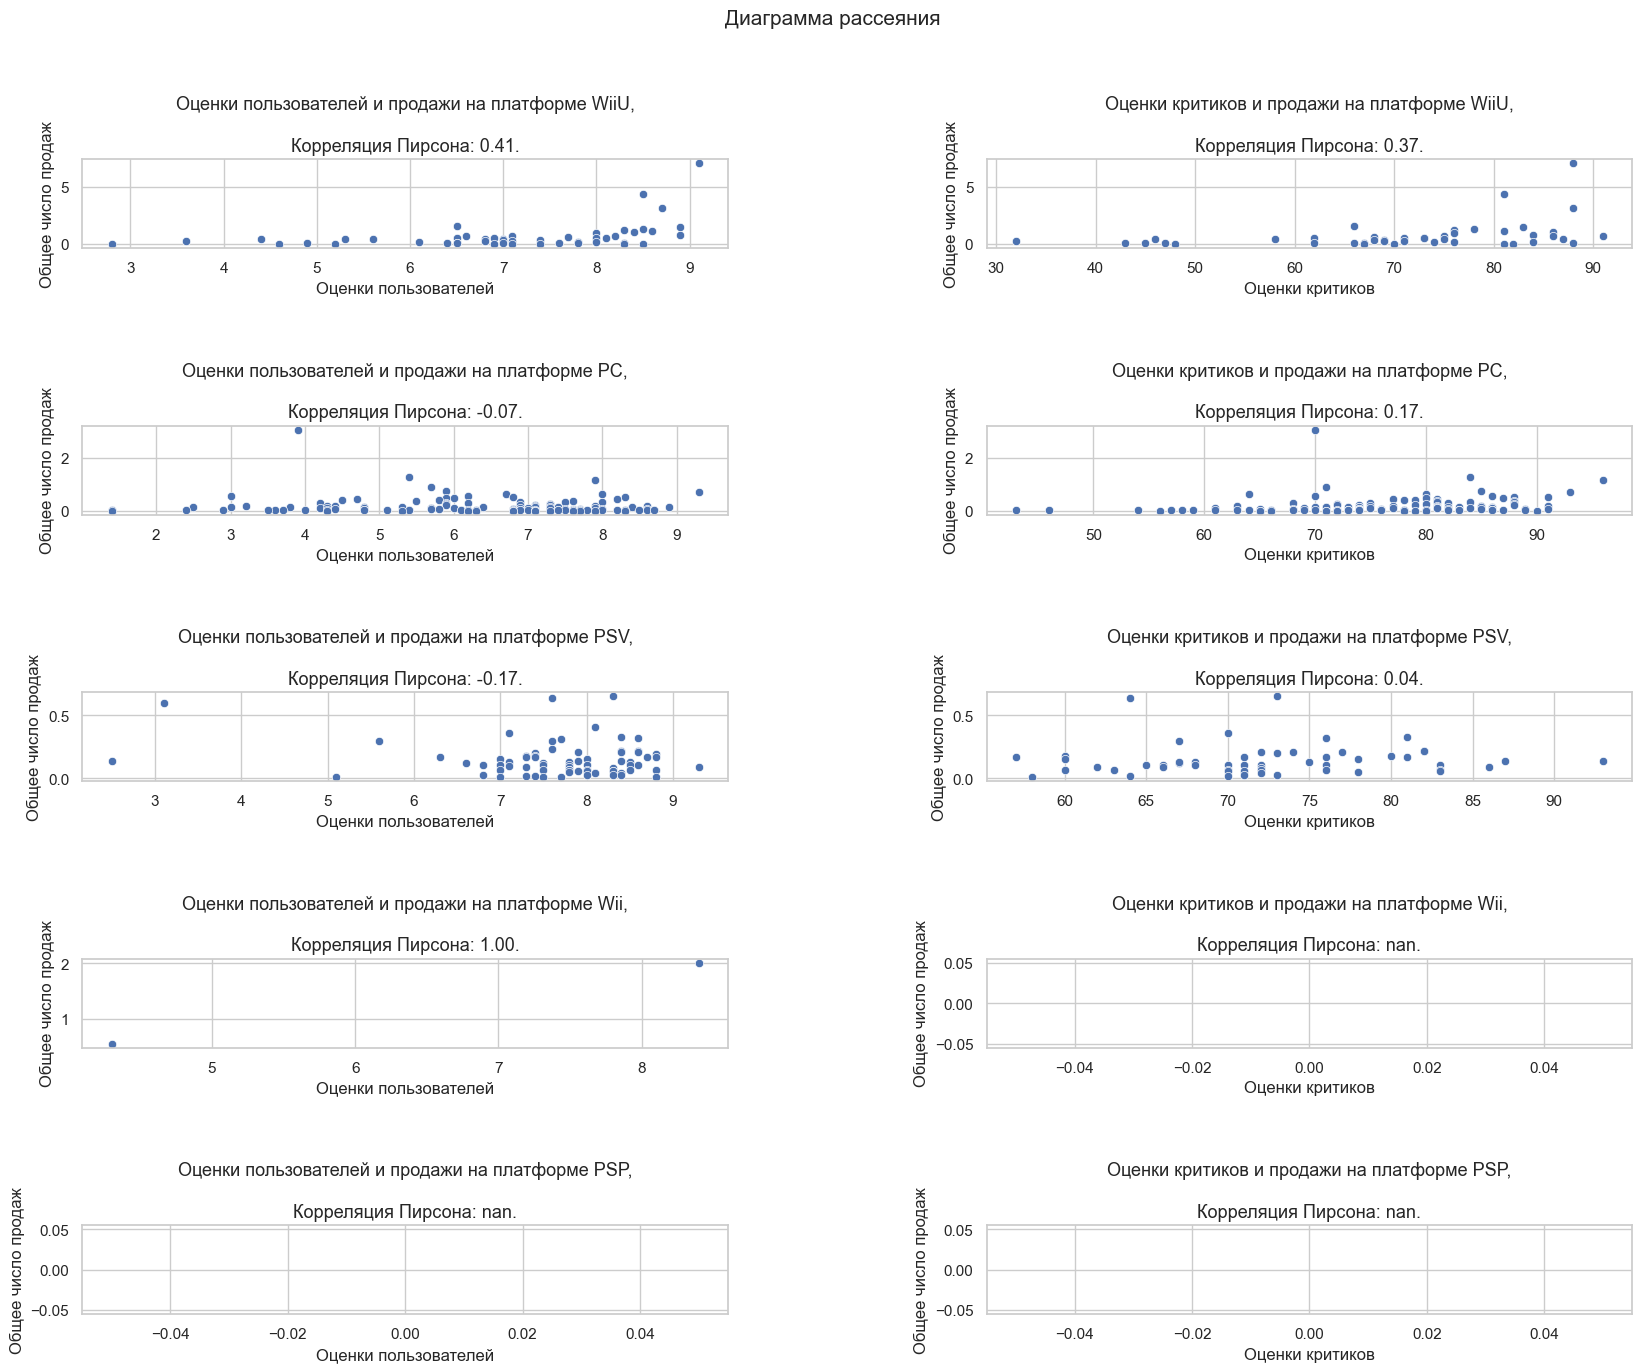

In [49]:
# теперь для второй части
rest_of_platforms_part2 = ['WiiU', 'PC', 'PSV', 'Wii', 'PSP']

pos = 0
plt.figure(figsize=(20,15))
plt.subplots_adjust(wspace=0.4, hspace=2)
plt.suptitle('Диаграмма рассеяния', fontsize=15)

for platform in rest_of_platforms_part2:
    pos += 1
    inter_df = profitable_platforms_df[(profitable_platforms_df['platform'] == platform)]
    
    if pos > 10:
        break
    
    plt.subplot(5, 2, pos)
    corr_with_user_score = inter_df['total_sales'].corr(inter_df['user_score'])
    plt.title(f'Оценки пользователей и продажи на платформе {platform},\n\nКорреляция Пирсона: {corr_with_user_score:.2f}.', fontsize=13)
    sns.scatterplot(x='user_score', y='total_sales', data=inter_df)
    plt.xlabel('Оценки пользователей')
    plt.ylabel('Общее число продаж')
    plt.grid(True)
    
    pos += 1
    
    if pos > 10:
        break
    
    plt.subplot(5, 2, pos)
    corr_with_critic_score = inter_df['total_sales'].corr(inter_df['critic_score'])
    plt.title(f'Оценки критиков и продажи на платформе {platform},\n\nКорреляция Пирсона: {corr_with_critic_score:.2f}.', fontsize=13)
    sns.scatterplot(x='critic_score', y='total_sales', data=inter_df)
    plt.xlabel('Оценки критиков')
    plt.ylabel('Общее число продаж')
    plt.grid(True)

**Вывод:** влияние оценок критиков и пользователей на продажи для платформы `XOne` (`0.43` и `-0.07` соответственно), `PS3` (`0.45` и `-0.17`  соответственно), `X360` (`0.53` и `-0.14` соответственно) практически аналогично тому, что наблюдается для платформы `PS4` (`0.4` и `-0.04`  соответственно): оценки критиков оказывают умеренное влияние на продажи, тогда как оценки пользователей не влияют совсем.

Для покупки игр оценки критиков и пользователей на платформах `WiiU` (`0.37` и `0.41` соответственно) и `DS3` (`0.31` и `0.22` соответственно) оказывают практически одинаковое влияние. 

Для платформы `PC` корреляция продаж с оценками пользователей отрицательная (`-0.07`), корреляция оценки критиков с продажами минимальна (`0.17`). Связи уровня продаж игр на этой платформе с оценками критиков или пользователей можно не учитывать. Здесь скорей всего влияет большой срок платформы на рынке и привычка пользователей пользоваться ПК.

Аналогичная ситуация наблюдается для платформы `PSV` оценки пользоваелей имеют отрицательную корреляцию с продажами (`-0.17`) и практически нулевую корреляцию имеют оценки критиков (`0.04`).

Для платформ `Wii` и `PSP` корреляцию оценок пользователей и критиков с продажами даже вычислить невозможно.

В целом можно сделать вывод, что отзывы критиков влияют на уровень продаж.

**Посмотрим на общее распределение игр по жанрам. Что мы можем сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**

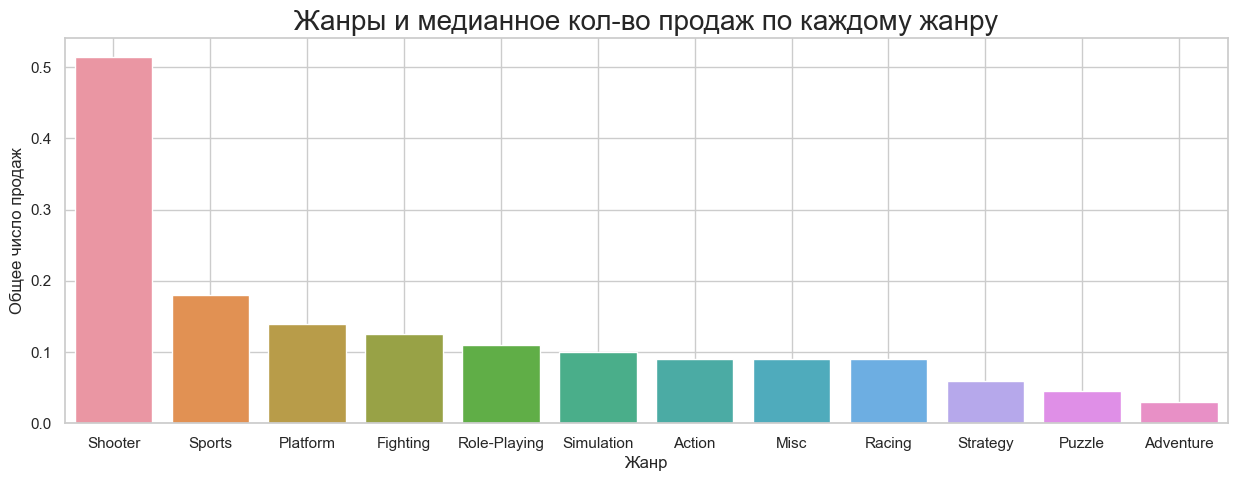

In [50]:
genres_and_total_sales = actual_period.pivot_table(index='genre',
                                                   values='total_sales',
                                                   aggfunc='median').sort_values(by='total_sales',
                                                                                 ascending=False).reset_index()
plt.figure(figsize=(15, 5))
plt.title('Жанры и медианное кол-во продаж по каждому жанру', fontsize=20)
sns.barplot(x='genre', y='total_sales', data=genres_and_total_sales)
plt.ylabel('Общее число продаж')
plt.xlabel('Жанр')
plt.grid(True);

Рассмотрим популярность жанров по платформам за актуальный период подробнее.

In [51]:
actual_period['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

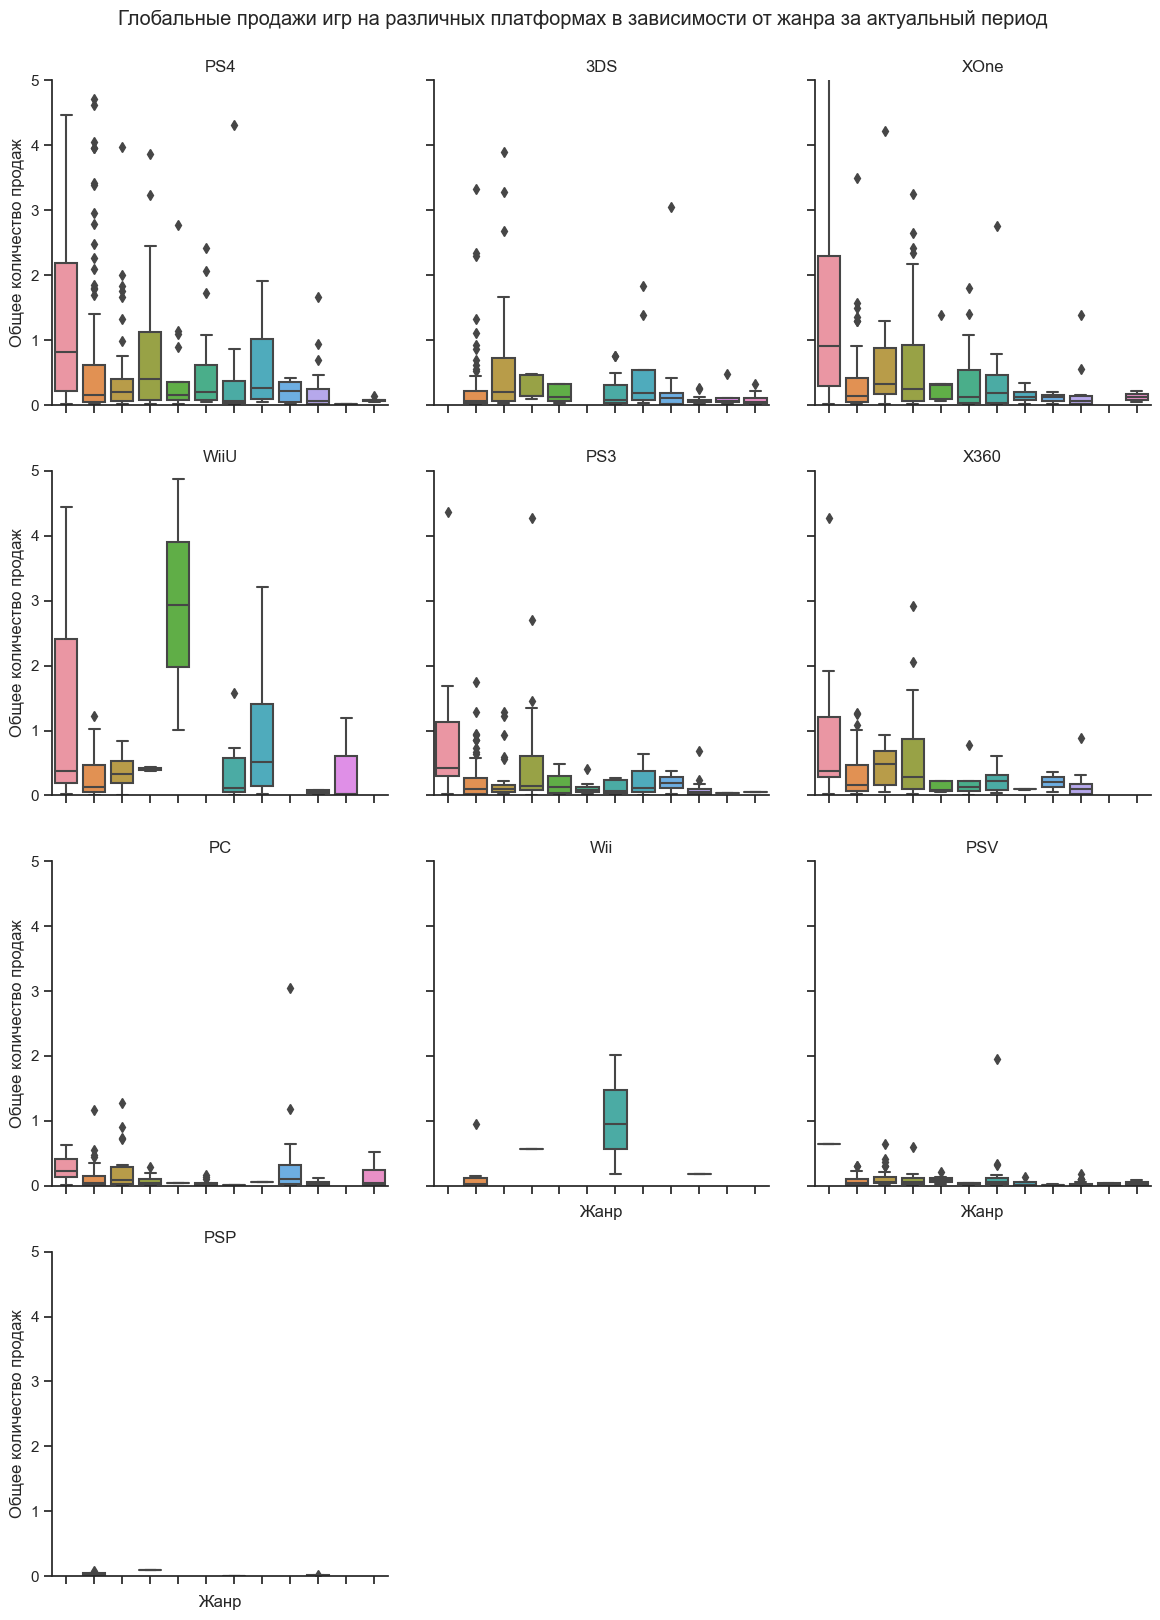

In [52]:
sns.set(style='ticks')

platform_order = ['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV', 'PSP']

grid = sns.catplot(x='genre', y='total_sales', col='platform', data=actual_period, kind='box', height=4, aspect=1, 
                   col_wrap=3, row_order=platform_order)
grid.set_xticklabels(rotation=90)

for ax in grid.axes.flat:
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(ax.get_title().split('=')[1].strip())

grid.set_xlabels('Жанр')
grid.set_ylabels('Общее количество продаж')
grid.fig.suptitle('Глобальные продажи игр на различных платформах в зависимости от жанра за актуальный период', 
                  y=1.02)

ax.set_ylim(0, 5)

plt.show();

**Вывод:** 

Топ-5 самых продаваемых жанров составляют: `Shooter` (стрелялки), `Sports` (спортивные соревнования), 
`Role-Playing` (ролевые игры), `Platform` (активные перемещения с препятствиями), `Fighting` (бои).

Сделаем **вывод по уровню продаж популярных жанров по платформам за актуальный период**.

Самый популярный жанр — `Shooter` (стрелялки), однако популярен он не на всех платформах: наиболее высокие продажи игр этого жанра наблюдаются на платформах `PS4`, `XOne` и `WiiU`, также можно отметить продажи этого жанра на платформах `PS3`, `X360`, на остальных платформах этот жанр не пользуется особой популярностью.

Жанр `Sports` (спортивные соревнования) наиболее популярен на платформах `PS4`, `XOne`, `X360`, есть также продажи этого жанра на платформах `3DS` и `PS4`, на остальных платформах этот жанр не особенно представлен.

Жанр `Role-Playing` (ролевые игры) наиболее популярен на платформах `3DS` и `XOne`, меньшая популярность этого жанра на платформах `PS4`, `WiiU` и `X360`. На остальных платформах продажи либо слабые, либо нет совсем.

Жанр `Platform` (активные перемещения с препятствиями) наиболее популярен на платформах `WiiU` и `PS4`, менее популярен на платформах `3DS и `PS3`. На остальных платформах продажи либо слабые, либо нет совсем.

Жанр `Fighting` (бои) наиболее популярен на платформе `WiiU`, продажи этого жанра на остальных платформах значительно ниже или отсутствуют.

## Составление портрета пользователя каждого региона

Здесь нужно определить для пользователя каждого региона (NA, EU, JP):

* Самые популярные платформы (топ-5). Опишите различия в долях продаж.
* Самые популярные жанры (топ-5). Поясните разницу.
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

**Самые популярные платформы (топ-5)**

In [53]:
na_user_df = actual_period.loc[:, 'name':'genre']
na_user_df['na_sales'] = actual_period['na_sales']
na_user_df['rating'] = actual_period['rating']

eu_user_df = actual_period.loc[:, 'name':'genre']
eu_user_df['eu_sales'] = actual_period['eu_sales']
eu_user_df['rating'] = actual_period['rating']

jp_user_df = actual_period.loc[:, 'name':'genre']
jp_user_df['jp_sales'] = actual_period['jp_sales']
jp_user_df['rating'] = actual_period['rating']

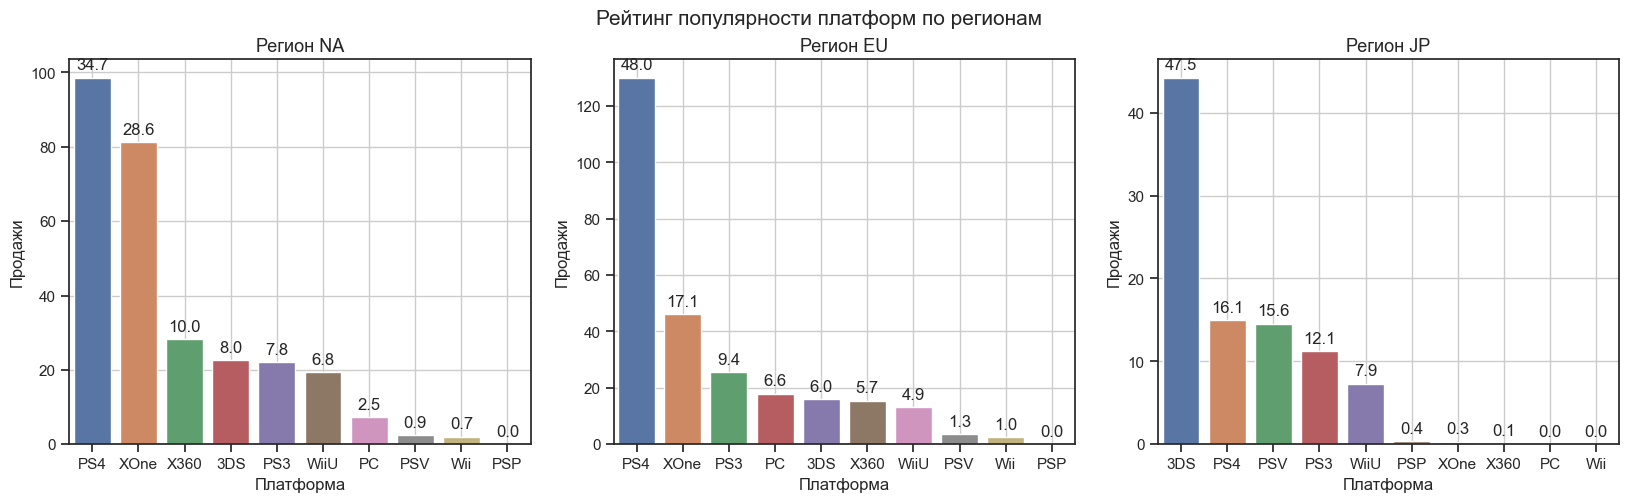

In [54]:
pos = 0
plt.figure(figsize=[20, 5])
plt.subplots_adjust(wspace=0.18, hspace=0.3)
plt.suptitle('Рейтинг популярности платформ по регионам', fontsize=15)
for region, pred_for_region in {'na_sales': na_user_df, 'eu_sales': eu_user_df, 'jp_sales': jp_user_df}.items():
    pos += 1
    total_sales_in_region = pred_for_region[region].sum()
    total_sales_in_region_by_platform = pred_for_region.pivot_table(index='platform',
                                                                   values=region,
                                                                   aggfunc='sum').sort_values(by=region,
                                                                                              ascending=False).reset_index()
    plt.subplot(1, 3, pos)
    plt.title(f'Регион {region[0:2].upper()}', fontsize=13)
    popular_platform = sns.barplot(x='platform', y=region, data=total_sales_in_region_by_platform)
    for p in popular_platform.patches:
        popular_platform.annotate(format(p.get_height() / total_sales_in_region * 100, '.1f'), 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center',
        va = 'center', 
        xytext=(0, 9), 
        textcoords='offset points')
    plt.ylabel('Продажи')
    plt.xlabel('Платформа')
    plt.grid(True);

В **Северной Америке** топ-5 самых популярных платформ следующий:

1. `PS4` – `34.7 %` от общего объема продаж в регионе.
2. `XOne` – `28.6 %` от общего объема продаж в регионе.
3. `X360` — `10 %` от общего объема продаж в регионе.
4. `3DS` — `8 %` от общего объема продаж в регионе.
5. `PS3` — `7.8 %` от общего объема продаж в регионе.

В **Европе** топ-5 самых популярных платформ следующий:

1. `PS4` – `48 %` от общего объема продаж в регионе.
2. `XOne` – `17.1 %` от общего объема продаж в регионе.
3. `PS3` — `9.4 %` от общего объема продаж в регионе.
4. `PC` — `6.6 %` от общего объема продаж в регионе.
5. `3DS` — `6 %` от общего объема продаж в регионе.

В **Японии** топ-5 самых популярных платформ следующий:

1. `3DS` – `47.5 %` от общего объема продаж в регионе.
2. `PS4` – `16.1 %` от общего объема продаж в регионе.
3. `PSV` — `15.6 %` от общего объема продаж в регионе.
4. `PS3` — `12.1 %` от общего объема продаж в регионе.
5. `WiiU` — `7.9 %` от общего объема продаж в регионе.

**Вывод:**

`PS4` является одной из наиболее популярных платформ во всех трех регионах. Она лидирует в Северной Америке и Европе и занимает второе место в Японии. `XOn`e пользуется большой популярностью в Северной Америке и Европе, но в Японии ее доля рынка невелика. `3DS` наиболее популярна в Японии и имеет значительную долю рынка, но в Северной Америке и Европе ее популярность невысокая. `PS3` также занимает заметное место во всех трех регионах, но ее популярность снижается по мере выхода более новых платформ. `X360` и `PC` имеют значительную долю рынка в Северной Америке, ниже в Европе, но популярностью в Японии они не пользуются.

Разницу в популярности платформ в разных регионах можно объяснить несколькими факторами. Важную роль играют географические и культурные различия. Разные регионы имеют разные предпочтения и представления об игровых платформах. Например, в Японии сильно развит рынок портативных игровых консолей, таких как Nintendo 3DS, благодаря повсеместной популярности мобильных игр и коммуникации в японской культуре. Наличие эксклюзивных игр для определенной платформы может влиять на ее популярность в конкретном регионе. Например, PlayStation в Японии имеет большое количество эксклюзивных JRPG (японских ролевых игр), которые очень популярны среди японских геймеров. Разные игровые компании могут активно продвигать свои продукты в разных регионах. Стратегии маркетинга, целевая аудитория и доступность определенных платформ могут существенно варьироваться.

Культура и особенности игровой индустрии в каждом регионе могут влиять на предпочтения геймеров. Например, в Северной Америке и Европе популярны консольные игры с высоким бюджетом и реалистичным геймплеем, в то время как в Японии большую популярность имеют японские RPG и игры с уникальным стилем и анимацией.

**Самые популярные жанры (топ-5)**

Для начала построим столбчатые диаграммы по регионам, чтобы посмотреть распределение популярных жанров: выделим топ-5 популярных жанров и жанры, которые не вошли в том, выделим в отдельную группу "Другие".

C:\Users\79206\AppData\Local\Temp\ipykernel_11172\2651480468.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_5_genres = top_5_genres.append({'genre': 'Другие', region: other_median_sales}, ignore_index=True)
C:\Users\79206\AppData\Local\Temp\ipykernel_11172\2651480468.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_5_genres = top_5_genres.append({'genre': 'Другие', region: other_median_sales}, ignore_index=True)
C:\Users\79206\AppData\Local\Temp\ipykernel_11172\2651480468.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_5_genres = top_5_genres.append({'genre': 'Другие', region: other_median_sales}, ignore_index=True)


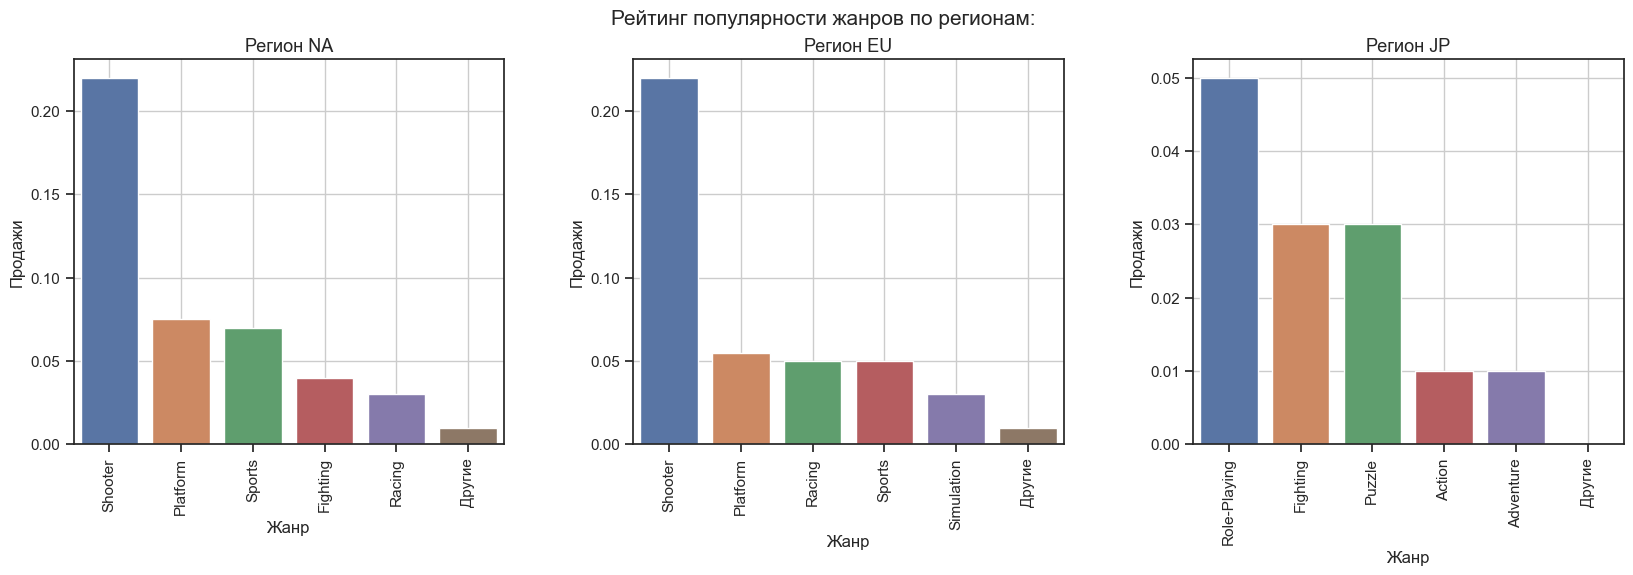

In [55]:
pos = 0
plt.figure(figsize=[20, 5])
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.suptitle('Рейтинг популярности жанров по регионам:', fontsize=15)

for region, user_df in {'na_sales': na_user_df, 'eu_sales': eu_user_df, 'jp_sales': jp_user_df}.items():
    pos += 1
    total_sales_in_region_by_genre = user_df.pivot_table(index='genre',
                                                         values=region,
                                                         aggfunc='median').sort_values(by=region,
                                                                                     ascending=False).reset_index()

    top_5_genres = total_sales_in_region_by_genre.head(5)
    other_genres = total_sales_in_region_by_genre.tail(total_sales_in_region_by_genre.shape[0] - 5)

    if len(other_genres) > 0:
        other_median_sales = user_df.loc[user_df['genre'].isin(other_genres['genre'])][region].median()
        top_5_genres = top_5_genres.append({'genre': 'Другие', region: other_median_sales}, ignore_index=True)
    
    plt.subplot(1, 3, pos)
    plt.title(f'Регион {region[0:2].upper()}', fontsize=13)
    sns.barplot(x='genre', y=region, data=top_5_genres)
    plt.xlabel('Жанр')
    plt.ylabel('Продажи')
    plt.xticks(rotation=90)
    plt.grid(True)

C:\Users\79206\AppData\Local\Temp\ipykernel_11172\73272745.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_5_genres = top_5_genres.append({'genre': 'Другие', region: other_median_sales}, ignore_index=True)
C:\Users\79206\AppData\Local\Temp\ipykernel_11172\73272745.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_5_genres = top_5_genres.append({'genre': 'Другие', region: other_median_sales}, ignore_index=True)
C:\Users\79206\AppData\Local\Temp\ipykernel_11172\73272745.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_5_genres = top_5_genres.append({'genre': 'Другие', region: other_median_sales}, ignore_index=True)


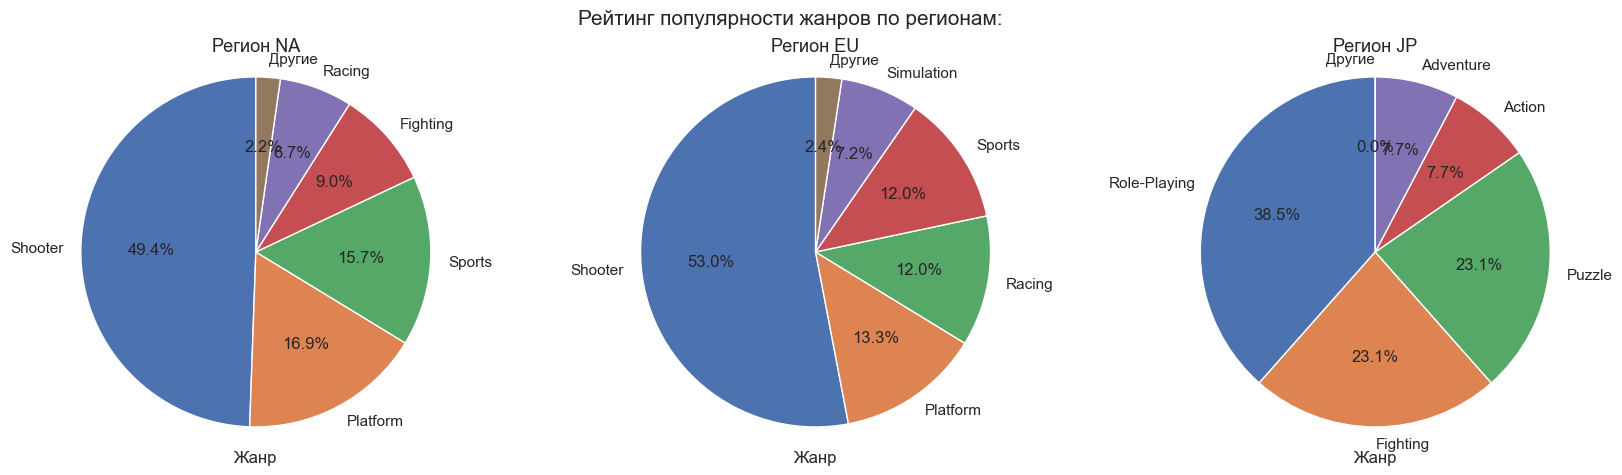

In [56]:
pos = 0
plt.figure(figsize=[20, 5])
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.suptitle('Рейтинг популярности жанров по регионам:', fontsize=15)

for region, user_df in {'na_sales': na_user_df, 'eu_sales': eu_user_df, 'jp_sales': jp_user_df}.items():
    pos += 1
    total_sales_in_region_by_genre = user_df.pivot_table(index='genre',
                                                         values=region,
                                                         aggfunc='median').sort_values(by=region,
                                                                                     ascending=False).reset_index()

    top_5_genres = total_sales_in_region_by_genre.head(5)
    other_genres = total_sales_in_region_by_genre.tail(total_sales_in_region_by_genre.shape[0] - 5)

    if len(other_genres) > 0:
        other_median_sales = user_df.loc[user_df['genre'].isin(other_genres['genre'])][region].median()
        top_5_genres = top_5_genres.append({'genre': 'Другие', region: other_median_sales}, ignore_index=True)
    
    plt.subplot(1, 3, pos)
    plt.title(f'Регион {region[0:2].upper()}', fontsize=13)
    plt.pie(top_5_genres[region], labels=top_5_genres['genre'], autopct='%1.1f%%', startangle=90, normalize=True)
    plt.axis('equal')
    plt.xlabel('Жанр')
    plt.ylabel('')
    plt.grid(True)

В **Северной Америке** топ-5 самых популярных жанров следующий:

1. `Shooter` (стрелялки)
2. `Platform` (активные перемещения с препятствиями)
3. `Sports` (спортивные соревнования)
4. `Fighting` (бои)
5. `Racing` (гонки)

В **Европе** топ-5 самых популярных жанров следующий:

1. `Shooter` (стрелялки)
2. `Platform` (активные перемещения с препятствиями)
3. `Racing` (гонки)
4. `Sports` (спортивные соревнования)
5. `Simulation` (симуляторы)

В **Японии** топ-5 самых популярных жанров следующий:

1. `Role_Playing` (ролевые игры)
2. `Fighting` (бои)
3. `Puzzle` (головоломки)
4. `Action` (экшен-игры)
5. `Adventure` (приключения)

Разница в предпочтениях жанров компьютерных игр по регионам может быть объяснена культурными и социальными различиями, а также особенностями игровой индустрии в каждом регионе.

**Северная Америка:**

Стрелялки часто являются конкурентными онлайн-играми с многопользовательским режимом, они пользуются большой популярностью среди американских игроков. Игры на платформах, включающие прыжки, бег и преодоление препятствий, также популярны в Северной Америке. Этот жанр имеет долгую историю и широкую аудиторию поклонников. Американская культура пропитана любовью к спорту, поэтому спортивные игры также находят своих поклонников. Жанр игр, в которых игроки сражаются друг с другом, имеет большую популярность в Северной Америке. Он связан с соревновательным духом. Вождение быстрых автомобилей или участие в гоночных соревнованиях также пользуется популярностью среди американских игроков.

**Европа:**

Подобно Северной Америке, стрелялки являются одним из самых популярных жанров в Европе. Как и на других континентах, игры на платформах имеют свою аудиторию в Европе. Гонки занимают третье место среди популярных жанров в Европе, вероятно из-за большого интереса к автомобильным соревнованиям, как профессиональным, так и любительским. Европейцы также проявляют интерес к спортивным играм. Симуляторы, которые позволяют игрокам воплотиться в разных ролях или имитировать реальные ситуации, имеют свою аудиторию в Европе, при этом совсем не пользуются популярностью в Северной Америке.

**Япония:**

Ролевые игры имеют значительную популярность в Японии. Японская игровая индустрия известна своими яркими и насыщенными ролевыми играми с глубокими сюжетами и длительным геймплеем. Боевые игры, где игроки сражаются друг с другом, также популярны в Японии. Игры с головоломками, кроссворды и другие формы логического мышления имеют поклонников в Японии, в то время как в Северной Америке и Европе они совсем не пользуются популярностью. Японские игроки также проявляют интерес к экшн-играм с динамичным геймплеем и интенсивными боевыми сценами. Жанр приключенческих игр, предлагающих интересные и захватывающие истории, также пользуется популярностью среди японских игроков.

Эти различия в предпочтениях могут быть связаны с культурными и историческими отличиями между регионами, а также с игровыми предпочтениями и предложением игр на рынке каждого региона.

**Посмотрим, влияет ли рейтинг ESRB на продажи в отдельном регионе.**

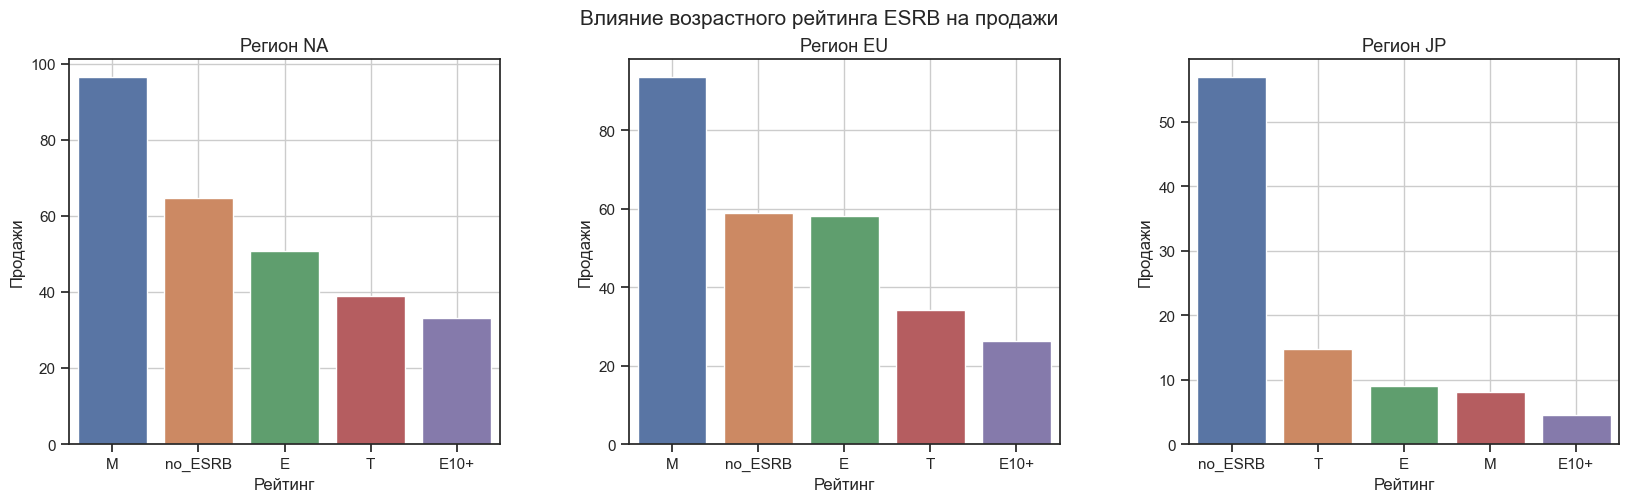

In [57]:
pos = 0
plt.figure(figsize=[20, 5])
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.suptitle('Влияние возрастного рейтинга ESRB на продажи', fontsize=15)
for region, pred_for_region in {'na_sales': na_user_df, 'eu_sales': eu_user_df, 'jp_sales': jp_user_df}.items():
    pos += 1
    plt.subplot(1, 3, pos)
    rating_in_region = pred_for_region.pivot_table(index='rating',
                                                   values=region,
                                                   aggfunc='sum').reset_index().sort_values(by=region, 
                                                                                            ascending=False).reset_index()
    plt.title(f'Регион {region[0:2].upper()}', fontsize=13)
    sns.barplot(x='rating', y=region, data=rating_in_region)
    plt.xlabel('Рейтинг')
    plt.ylabel('Продажи')
    plt.grid(True)

В Северной Америке и Европе большую часть продаж составляют игры рейтинга `M` ("Для взрослых") и `E` ("Для всех"), при этом значительная доля игр имеют `no_ESRB` (нет оценки ESRB), которым мы заменили пропуски в данных. В Японии большую часть продаж составляет игры с рейтингом `no_ESRB` (нет оценки ESRB), поскольку этот рейтинг не распространялся на Японию и большинство игр просто не имеют соотвествующих отметок. В Японии незначительное количество игр представлено рейтингом `T` ("Подросткам") и `E` ("Для всех"), рейтинг `M` ("Для взрослых") в продажах в Японии чуть устапает по покупялности рейтингку `E`. Топ-5 во всех трех регионах закрывает рейтинг `E10+` ("Для всех от 10 лет и старше").

**Предпочтения по возрастному рейтингу в разных регионах могут быть обусловлены несколькими факторами:**

Культурные нормы и ценности могут влиять на предпочтения игровой аудитории. В Северной Америке и Европе игры с рейтингом `M` ("Для взрослых") и `E` ("Для всех") популярны, что может быть связано с широким разнообразием интересов и возрастных групп. В Японии же игры с рейтингом `RP` ("Рейтинг ожидается") более распространены, что может быть связано с отличительной японской культурой и восприятием развлекательных продуктов.

Возможно, производители игр разрабатывают и выпускают продукты, соответствующие потребностям и вкусам конкретных регионов. Если в Северной Америке и Европе игры с рейтингом `M` и `E` успешно продаются, производители будут склоняться к выпуску большего количества игр с такими рейтингами, чтобы удовлетворить запросы аудитории.

Региональные законы и политика могут влиять на доступность и продажи игр с определенными рейтингами. Например, в некоторых странах могут существовать ограничения на продажу или рекламу игр с высоким рейтингом возраста. Это может повлиять на спрос и соответственно на продажи таких игр в конкретных регионах.

Маркетинговые усилия и рекламные кампании могут воздействовать на предпочтения потребителей и формировать их интересы. Если игры с определенным рейтингом активно рекламируются и популяризируются в определенном регионе, это может способствовать их большей популярности и высоким продажам.

Таким образом, предпочтения по возрастному рейтингу в регионах отражают множество факторов, включая культурные особенности, предложение игр на рынке, маркетинговые стратегии и регулятивное воздействие.

## Проверка гипотез

**1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

Для проверки гипотезы о равенстве средних пользовательских рейтингов на двух платформах (`XOne` и `PC`) сформулируем нулевую и альтернативную гипотезы следующим образом:


**H_0**: средние пользовательские рейтинги платформ `Xbox One` **равны** пользовательским рейтингам платформы `PC`.

**H_1**: средние пользовательские рейтинги платформ `Xbox One` и `PC` различаются (**не равны**).    
    

In [58]:
# выберем нужные данные по платформам
XOne = actual_period.query('platform == "XOne"')['user_score']
PC = actual_period.query('platform == "PC"')['user_score']

In [59]:
# проверим, на каком объеме даных мы проверяем гипотезу, чтобы установить уровень стат.значимости
print(len(XOne))
print(len(PC))

228
151


Для проверки гипотезы используем t-критерий Стьюдента (t-test), т. к. у нас есть две независимые выборки и мы хотим сравнить их средние значения. В данном случае используем t-критерий Стьюдента для независимых выборок, поскольку предполагаем, что выборки на платформах `XOne` и `PC` не связаны между собой.

При проведении t-теста установим уровень статистической значимости (`alpha`) `0.01`, что означает, что если `p-value` (вероятность получить такие или еще более экстремальные результаты при условии справедливости нулевой гипотезы) меньше или равно `0.01`, то мы отвергаем нулевую гипотезу.

In [60]:
# данных немного, установим уровень стат.значимости alpha 1 %
alpha = 0.01

results = st.ttest_ind(XOne, PC, nan_policy='omit', equal_var=False)

print('P-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

P-value: 0.11601398086668943
Не получилось отвергнуть нулевую гипотезу


Таким образом, на основе имеющихся данных нет статистически значимых доказательств, чтобы утверждать, что средние пользовательские рейтинги на платформах `XOne` и `PC` различаются. Однако для более полного анализа рассмотрим средние пользовательские рейтинги по разным жанрам, чтобы проверить наш результат.

In [61]:
mean_user_score_by_platform = actual_period.query('platform == ["XOne","PC"]').pivot_table(
    index='platform', values=['user_score'], aggfunc='mean')
mean_user_score_by_platform

,user_score
platform,
PC,6.298361
XOne,6.594545


**Вывод:** нулевую гипотезу не получилось отвергнуть, значит средние пользовательские рейтинги платформ `Xbox One` и `PC` **не различаются**, что мы подтвердили, получив среднюю пользовательскую оценку для этих платформ (значения практически одинаковые).

**2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**

Для проверки гипотезы о неравенстве средних пользовательских рейтингов двух жанров (`Action` и `Action`) сформулируем нулевую и альтернативную гипотезы следующим образом:


**H_0** (всегда содержит равенство): средние пользовательские рейтинги жанров `Action` и `Sports` **равны**.

**H_1**: средние пользовательские рейтинги жанров `Action` и `Sports` различаются (**не равны**).

In [62]:
# выберем нужные данные по жанрам
action = actual_period.query('genre == "Action"')['user_score']
sports = actual_period.query('genre == "Sports"')['user_score']

In [63]:
# проверим, на каком объеме даных мы проверяем гипотезу, чтобы установить уровень стат.значимости
print(len(action))
print(len(sports))

619
161


Для проверки гипотезы используем t-критерий Стьюдента (t-test). В данном случае мы применили t-критерий Стьюдента для независимых выборок, поскольку у нас есть две независимые выборки (рейтинги игр в жанрах `Action` и `Sports`) и мы хотим оценить, есть ли статистически значимое различие между их средними значениями.

При проведении t-теста установим уровень статистической значимости (`alpha`) `0.01`. Если значение `p-value` (вероятность получить такие или еще более экстремальные результаты при условии справедливости нулевой гипотезы) меньше или равно `0.01`, мы отвергаем нулевую гипотезу.

In [64]:
# данных немного, установим уровень стат.значимости alpha 1 %
alpha = 0.01

results = st.ttest_ind(action, sports, nan_policy='omit', equal_var=False)

print('P-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

P-value: 1.182555038264477e-14
Отвергаем нулевую гипотезу


Таким образом, на основе имеющихся данных у нас есть статистически значимые доказательства, чтобы утверждать, что средние пользовательские рейтинги в жанрах `Action` и `Sports` различаются. Для более полного анализа и подтверждения результатов рассмотрим средние рейтинги по разным платформам, чтобы проверить наш результат.

In [65]:
mean_user_score_by_genre = actual_period.query('genre == ["Action", "Sports"]').pivot_table(
    index='genre', values=['user_score'], aggfunc='mean')
mean_user_score_by_genre

,user_score
genre,
Action,6.760606
Sports,5.225197


**Вывод:** нулевую гипотезу отвергаем, значит средние пользовательские рейтинги жанров `Action` и `Sports` **различаются**, что мы подтвердили, получив среднюю пользовательскую оценку для этих жанров (значения разные).

## Oбщий вывод

Предоставленный датафрейм состоял из `16715` строк и `11` столбцов. Он содержит информацию об игровых продажах, включая названия игр, платформы, жанры, оценки пользователей и критиков, год выпуска и продажи в различных регионах.

Для предобработки данных мы выполнили следующие шаги:

1. Привели названия столбцов к нижнему регистру для удобства работы.

2. Изменили тип данных столбца `year_of_release` с вещественного на целочисленный, т. к. год выпуска представляет собой целочисленное значение.

3. Удалили строки с пропущенными значениями в столбце `year_of_release`, т. к. он играет важную роль в анализе и не может быть заменен или восстановлен.

4. Удалили строки с пропущенными значениями в столбцах `name` и `genre`, т. к. их количество было незначительным.

5. Заменили значения `tbd` (to be determined) в столбце `user_score` на `NaN`, т. к. эти значения означают, что рейтинг еще не определен. Также изменили тип данных этого столбца на вещественный.

6. Заменили пропущенные значения в столбце `rating` на `no_ESRB` (нет оценки ESRB), поскольку соответствующие игры не имеют оценки ESRB по разным причинам: значения рейтинга могли не внести в таблицу или соответствующие игры были выпущены в тех странах, в которых подобный рейтинг не присваивается.

После предобработки данных мы получили датафрейм с `16443` строками и `12` столбцами.

В ходе анализа мы выяснили, что, начиная с `1994` года, наметилась тенденция роста количества выпускаемых игр, с каждым последюущим годом их становилось все больше и больше, а в период с `2006` по `2011` год выпускалось более тысячи игр каждый код. 

Проанализировав полученную информацию, мы сделали вывод, что **наибольшее количество продаж было на шести платформах** (`PS2`, `X360`, `PS3`, `Wii`, `DS`, `PS`). Количество продаж на остальных платформах сильно отличается в меньшую сторону.

Далее мы определили характерный срок, за который появляются новые и исчезают старые платформы. Тенденцию мы проследили на лидирующих пллатформах и выяснили, что средний **срок жизни платформы** составляет **`7` лет**.

Для дальнейшего анализа и построения прогноза на `2017` год мы взяли **актуальный период** в три года, т. е. **с `2014` по `2016` гг. включительно**, поскольку три года — это достаточный срок, чтобы отследить тенденции развития индустрии игр. Для анализа было выбрано `10` платформ.

Далее мы определили **потенциально прибыльные платформы**: `PC`, `PS4`, `XOne` и `WiiU`.

На следующем этапе мы оценили, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. В результате сделали вывод, что **отзывы критиков** в большинстве случаев **имеют большее значение** при покупке игр, чем отзывы пользователей.

Далее мы выявили **топ-5 популярных жанров** составляют: `Shooter` (стрелялки), `Sports` (спортивные соревнования), `Role-Playing` (ролевые игры), `Platform` (активные перемещения с препятствиями), `Fighting` (бои). Посмотрели популярность этих жанров по платформам, нашли различия, на одних платформах какой-то жанр может быть очень популярным, в то время как на других менее популярным или не представленным вообще.

И составили **портрет пользователя каждого региона**.

**Профиль пользователя в Северной Америке** 🎮:

Популярные платформы: `PS4` 🎮 (34.7%), `XOne` 🎮 (28.6%), `X360` 🎮 (10%), `3DS` 🎮 (8%), `PS3` 🎮 (7.8%).

Популярные жанры: `Shooter` 🔫, `Platform` 🏃‍♂️, `Sports` ⚽, `Fighting` 🥊, `Racing` 🏎️.

Рейтинги игр: преобладают игры с рейтингами `M` ("Для взрослых") и `E` ("Для всех").

**Профиль пользователя в Европе** 🎮:

Популярные платформы: `PS4` 🎮 (48%), `XOne` 🎮 (17.1%), `PS3` 🎮 (9.4%), `PC` 💻 (6.6%), `3DS` 🎮 (6%).

Популярные жанры: `Shooter` 🔫, `Platform` 🏃‍♂️, `Racing` 🏎️, `Sports` ⚽, `Simulation` 🎢.

Рейтинги игр: преобладают игры с рейтингами `M` ("Для взрослых") и `E` ("Для всех").

**Профиль пользователя в Японии** 🎮:

Популярные платформы: `3DS` 🎮 (47.5%), `PS4` 🎮 (16.1%), `PSV` 🎮 (15.6%), `PS3` 🎮 (12.1%), `WiiU` 🎮 (7.9%).

Популярные жанры: `Role_Playing` 🗡️, `Fighting` 🥊, `Puzzle` 🧩, `Action` 🕹️, `Adventure` 🌍.

Рейтинги игр: преобладают игры с рейтингом `T` ("Подросткам") и `E` ("Для всех"), больше всего игр с рейтингом `RP` ("Рейтинг ожидается"), поскольку мы производили замену отсутствующих значений.

🌍В целом, игроки в **Северной Америке** и **Европе** предпочитают `PS4` и `XOne`, с фокусом на стрелялках, платформерах и спортивных играх, при этом игры с рейтингами `M` ("Для взрослых") и `E` ("Для всех") наиболее популярны. В Японии популярны портативные консоли, такие как `3DS` и `PSV`, с акцентом на ролевых играх и боевиках, и с преобладанием игр с рейтингами `T` ("Подросткам") и `E` ("Для всех"), однако огромная доля игр не имеет рейтинга ESRB, поскольку он распространялся только на Северную Америку и Канаду.

В ходе анализа были **проверены гипотезы и получены результаты**:

средние пользовательские рейтинги платформ `Xbox One` и `PC` не различаются, а средние пользовательские рейтинги жанров `Action` и `Sports` различаются, выводы были подкреплены вычислениями средних значений.


Сделаем вывод по **перспективным направлениям в регионах**:
    

* <u>Северная Америка</u>

Плафтормы: `PS4`, `XOne`

Жанры: `Shooter`, `Platform`

Рейтинг: `M`, `E`
    

* <u>Европа</u>

Плафтормs: `PS4`, `XOne`

Жанры: `Shooter`, `Platform`

Рейтинг: `M`, `E`


* <u>Япония</u>

Плафтормы: `3DS`, `PS4`

Жанры: `Role-playing`, `Fighting`

Рейтинг: `T` и `E`